# Baby Names EDA Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')
                 
df.head()

,year,name,gender,count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


In [4]:
df.tail()

,year,name,gender,count
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5
1957045,2018,Zzyzx,M,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
year      int64
name      object
gender    object
count     int64
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


## Unique Names

In [9]:
df.columns

print(len(df.name.unique()))

df['name'].unique()

98400


array(['Mary', 'Anna', 'Emma', ..., 'Zihir', 'Zin', 'Zuber'], dtype=object)

In [8]:
df['name'].nunique()

98400

In [11]:
# Unique names for male.

df.columns

df[df['gender']=='M']['name'].nunique()

41475

In [12]:
# Unique names for female.
df[df["gender"] == "F"]["name"].nunique()


67698

In [14]:
# Unique names for gender neutral.
both_df = df.pivot_table(index="name", columns="gender", values="count", aggfunc=np.sum).dropna()
print(both_df)

both_df.index

gender         F       M
name                    
Aaden        5.0  4828.0
Aadi        16.0   851.0
Aadyn       16.0   516.0
Aalijah    149.0   212.0
Aaliyah  87442.0    96.0
...          ...     ...
Zyion      168.0   918.0
Zyon       620.0  2638.0
Zyonn        5.0    40.0
Zyree       16.0    94.0
Zyrie       19.0    16.0

[10773 rows x 2 columns]


Index(['Aaden', 'Aadi', 'Aadyn', 'Aalijah', 'Aaliyah', 'Aaliyan', 'Aamari',
       'Aamir', 'Aaren', 'Aareon',
       ...
       'Zyair', 'Zyaire', 'Zyan', 'Zyian', 'Zyien', 'Zyion', 'Zyon', 'Zyonn',
       'Zyree', 'Zyrie'],
      dtype='object', name='name', length=10773)

## Top 10 Male and Female Names

In [22]:
df_male = df[df['gender']=='M'][['name','count']].groupby('name').sum()

df_male

,count
name,
Aaban,114
Aabid,16
Aabir,10
Aadam,273
Aadan,130
...,...
Zyus,11
Zyvion,5
Zyvon,7


In [24]:
df_male.sort_values('count', ascending=False).head(10)

,count
name,
James,5164280
John,5124817
Robert,4820129
Michael,4362731
William,4117369
David,3621322
Joseph,2613304
Richard,2565301
Charles,2392779


In [26]:
df[df["gender"] == "F"][["name", "count"]].groupby("name").sum().sort_values("count", ascending=False).head(10)

,count
name,
Mary,4125675
Elizabeth,1638349
Patricia,1572016
Jennifer,1467207
Linda,1452668
Barbara,1434397
Margaret,1248985
Susan,1121703
Dorothy,1107635


## Top 20 Gender Neutral Names

In [27]:
df.columns

Index(['year', 'name', 'gender', 'count'], dtype='object')

In [29]:
nau_names = df.pivot_table(index='name', columns='gender', values='count', aggfunc=np.sum).dropna()
nau_names

gender,F,M
name,,
Aaden,5.0,4828.0
Aadi,16.0,851.0
Aadyn,16.0,516.0
Aalijah,149.0,212.0
Aaliyah,87442.0,96.0
...,...,...
Zyion,168.0,918.0
Zyon,620.0,2638.0
Zyonn,5.0,40.0


In [30]:
nau_names[(nau_names['F']>= 50000)& (nau_names['M']>=50000)].head(20)

gender,F,M
name,,
Alexis,338333.0,63604.0
Angel,95710.0,231800.0
Avery,125883.0,55646.0
Casey,76312.0,110635.0
Dana,191812.0,53098.0
Jackie,90705.0,78494.0
Jamie,268102.0,85631.0
Jessie,167462.0,110212.0
Jordan,131004.0,374513.0


## Highest and Lowest Years

In [31]:
#  which years had the highest and lowest amount of records by gender and combined.
df.columns

Index(['year', 'name', 'gender', 'count'], dtype='object')

In [33]:
both_df = df.groupby('year').sum()

both_df

,count
year,
1880,201484
1881,192696
1882,221533
1883,216944
1884,243461
...,...
2014,3698914
2015,3691990
2016,3657797


In [62]:
both_min_count = both_df.min()['count']

both_min_count

192696

In [63]:
both_min_year = both_df.idxmin()['count']

both_min_year

1881

In [64]:
both_max_count = both_df.max()['count']

both_max_count

4200022

In [65]:
both_max_year = both_df.idxmax()['count']

both_max_year

1957

In [44]:
male_df = df[df["gender"] == "M"].groupby("year").sum()
male_df

,count
year,
1880,110490
1881,100743
1882,113686
1883,104625
1884,114442
...,...
2014,1916564
2015,1911537
2016,1891585


In [66]:
male_max_count=male_df.max()['count']
male_max_count

2155711

In [67]:
male_max_year = male_df.idxmax()['count']
male_max_year

1957

In [68]:
male_min_count = male_df.min()['count']
male_min_count

100743

In [47]:
male_df.idxmin()

count    1881
dtype: int64

In [69]:
male_min_year = male_df.idxmin()['count']

male_min_year

1881

In [51]:
male_df[male_df.index==1881]

,count
year,
1881,100743


In [52]:
female_df = df[df["gender"] == "F"].groupby("year").sum()

female_df

,count
year,
1880,90994
1881,91953
1882,107847
1883,112319
1884,129019
...,...
2014,1782350
2015,1780453
2016,1766212


In [70]:
female_min_count = female_df.min()['count']

female_min_count

90994

In [54]:
female_df.idxmin()

count    1880
dtype: int64

In [71]:
female_min_year = female_df.idxmin()['count']
female_min_year

1880

In [57]:
female_df[female_df.index==1880]

,count
year,
1880,90994


In [73]:
female_max_count = female_df.max()['count']
female_max_count

2044311

In [74]:
female_max_year = female_df.idxmax()['count']
female_max_year

1957

In [101]:
both_max =pd.DataFrame([both_max_count, both_max_year])
both_max

,0
0,4200022
1,1957


In [114]:
data = pd.DataFrame()

both_max =pd.Series([both_max_count, both_max_year])
both_min = pd.Series([both_min_count, both_min_year])
male_max=pd.Series([male_max_count, male_max_year])
male_min =pd.Series([male_min_count, male_min_year])
female_max =pd.Series([female_max_count, female_max_year])
female_min = pd.Series([female_min_count, female_min_year])

data = pd.concat([both_max, both_min, male_max, male_min, female_max, female_min] , axis=0)
data

0    4200022
1       1957
0     192696
1       1881
0    2155711
1       1957
0     100743
1       1881
0    2044311
1       1957
0      90994
1       1880
dtype: int64

In [118]:
df_stat = pd.DataFrame()

df_stat['Total Count'] = data[data.index==0]
df_stat

,Total Count
0,4200022
0,192696
0,2155711
0,100743
0,2044311
0,90994


In [119]:
data[data.index==1]

1    1957
1    1881
1    1957
1    1881
1    1957
1    1880
dtype: int64

In [121]:
df_stat['Year']= data[data.index==1].tolist()

df_stat

,Total Count,Year
0,4200022,1957
0,192696,1881
0,2155711,1957
0,100743,1881
0,2044311,1957
0,90994,1880


In [122]:
df_stat.index=['Both Max', 'Both Min', 'Male Max', 'Male Min', 'Female Max', 'Female Min']

df_stat

,Total Count,Year
Both Max,4200022,1957
Both Min,192696,1881
Male Max,2155711,1957
Male Min,100743,1881
Female Max,2044311,1957
Female Min,90994,1880


## Plotting the Data

In [123]:
%matplotlib inline 

sns.set(style="ticks",
        rc={
            "figure.figsize": [12, 7],
            "text.color": "white",
            "axes.labelcolor": "white",
            "axes.edgecolor": "white",
            "xtick.color": "white",
            "ytick.color": "white",
            "axes.facecolor": "#443941",
            "figure.facecolor": "#443941"}
        )

## Counts by Year

In [125]:
both_df = df.groupby("year").sum()
male_df = df[df["gender"] == "M"].groupby("year").sum()
female_df = df[df["gender"] == "F"].groupby("year").sum()

In [126]:
both_df

,count
year,
1880,201484
1881,192696
1882,221533
1883,216944
1884,243461
...,...
2014,3698914
2015,3691990
2016,3657797


In [127]:
male_df

,count
year,
1880,110490
1881,100743
1882,113686
1883,104625
1884,114442
...,...
2014,1916564
2015,1911537
2016,1891585


In [128]:
female_df

,count
year,
1880,90994
1881,91953
1882,107847
1883,112319
1884,129019
...,...
2014,1782350
2015,1780453
2016,1766212


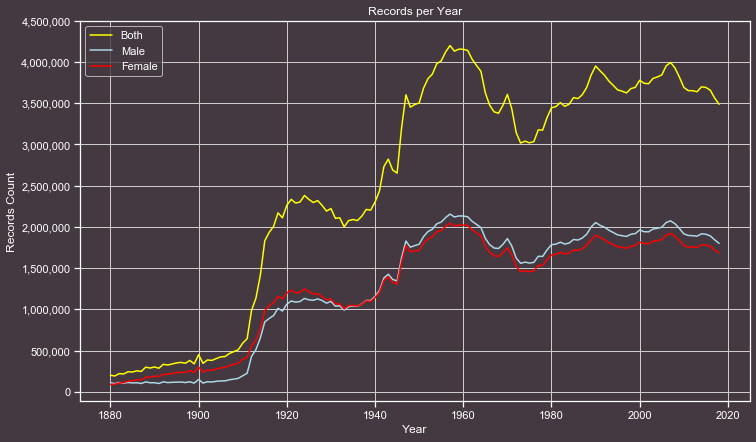

In [134]:
plt.plot(both_df, label="Both", color="yellow")
plt.plot(male_df, label="Male", color="lightblue")
plt.plot(female_df, label="Female", color="red")

yticks_labels = ["{:,}".format(i) for i in range(0, 4500000+1, 500000)]
plt.yticks(np.arange(0, 4500000+1, 500000), yticks_labels)

plt.legend()
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Records Count")
plt.title("Records per Year")
plt.show()

## Most Popular Names Growth

In [135]:
pivoted_df = df.pivot_table(index="name", columns="year", values="count", aggfunc=np.sum).fillna(0)

pivoted_df

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
name,,,,,,,,,,,,,,,,,,,,,
Aaban,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,9.0,11.0,11.0,14.0,16.0,15.0,9.0,11.0,7.0
Aabha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,5.0,0.0,9.0,7.0,7.0,0.0,0.0
Aabid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0
Aabidah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
Aabir,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyvion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zyvon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
Zyyanna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
pivoted_df.sum()

year
1880     201484.0
1881     192696.0
1882     221533.0
1883     216944.0
1884     243461.0
          ...    
2014    3698914.0
2015    3691990.0
2016    3657797.0
2017    3561975.0
2018    3487353.0
Length: 139, dtype: float64

In [138]:
percentage_df = pivoted_df / pivoted_df.sum() * 100

percentage_df

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
name,,,,,,,,,,,,,,,,,,,,,
Aaban,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000157,0.000244,0.000301,0.000301,0.000385,0.000433,0.000406,0.000246,0.000309,0.000201
Aabha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000192,0.000137,0.000000,0.000243,0.000190,0.000191,0.000000,0.000000
Aabid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000137,0.000000,0.000172
Aabidah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000143
Aabir,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000137,0.000000,0.000143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyvion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Zyvon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000190,0.000000,0.000000,0.000000
Zyyanna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [139]:
percentage_df["total"] = percentage_df.sum(axis=1)

percentage_df

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,total
name,,,,,,,,,,,,,,,,,,,,,
Aaban,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000244,0.000301,0.000301,0.000385,0.000433,0.000406,0.000246,0.000309,0.000201,0.003108
Aabha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000192,0.000137,0.000000,0.000243,0.000190,0.000191,0.000000,0.000000,0.000953
Aabid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000137,0.000000,0.000172,0.000440
Aabidah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000143,0.000143
Aabir,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000137,0.000000,0.000143,0.000280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyvion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000131
Zyvon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000190,0.000000,0.000000,0.000000,0.000190
Zyyanna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000163


In [141]:
sorted_df = percentage_df.sort_values(by="total", ascending=False).drop("total", axis=1)[0:10]

sorted_df

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
name,,,,,,,,,,,,,,,,,,,,,
Mary,3.519882,3.605679,3.691549,3.707869,3.800609,3.805625,3.885742,4.015878,3.941591,4.045393,...,0.082876,0.077902,0.074073,0.070698,0.072843,0.071291,0.071262,0.068566,0.067434,0.066727
John,4.814774,4.564184,4.332086,4.118113,3.872489,3.654081,3.553999,3.300821,3.105121,2.976335,...,0.317801,0.313287,0.303025,0.291117,0.294807,0.289409,0.281610,0.274072,0.266594,0.261860
James,2.952592,2.836073,2.667774,2.419057,2.351917,2.159399,2.108743,1.934978,1.872289,1.746347,...,0.373610,0.376833,0.363548,0.368386,0.373558,0.391277,0.402574,0.408115,0.403372,0.389092
William,4.745786,4.439117,4.211111,3.884413,3.668349,3.353484,3.245756,3.037273,2.920798,2.705696,...,0.469875,0.462482,0.475505,0.462851,0.457639,0.455350,0.431312,0.431435,0.420694,0.416534
Robert,1.204562,1.115228,1.133917,1.080924,1.016590,0.968637,0.963113,0.862191,0.945995,0.874558,...,0.205474,0.204967,0.191095,0.190518,0.184649,0.179728,0.165954,0.163732,0.155195,0.147390
Michael,0.175696,0.154648,0.144899,0.141511,0.153207,0.153620,0.136301,0.139454,0.155607,0.130474,...,0.497440,0.470960,0.460724,0.443465,0.426892,0.418745,0.391848,0.386079,0.355786,0.333778
Charles,2.659765,2.414684,2.308460,2.232834,1.980194,1.919420,1.784050,1.642730,1.542376,1.462903,...,0.190827,0.192480,0.191286,0.190354,0.193167,0.198977,0.194908,0.194762,0.201405,0.189743
David,0.431300,0.389214,0.378273,0.341102,0.312576,0.297691,0.263985,0.275675,0.267470,0.261987,...,0.404974,0.385284,0.362617,0.343880,0.339953,0.330556,0.319909,0.304145,0.286246,0.278435
Joseph,1.311270,1.279736,1.207946,1.167121,1.115579,1.060393,1.019121,0.998007,1.005433,0.946890,...,0.391454,0.375045,0.355582,0.344482,0.337095,0.327772,0.311431,0.298841,0.293545,0.274420


In [142]:
transposed_df = sorted_df.transpose()

transposed_df

name,Mary,John,James,William,Robert,Michael,Charles,David,Joseph,George
year,,,,,,,,,,
1880,3.519882,4.814774,2.952592,4.745786,1.204562,0.175696,2.659765,0.431300,1.311270,2.557027
1881,3.605679,4.564184,2.836073,4.439117,1.115228,0.154648,2.414684,0.389214,1.279736,2.435961
1882,3.691549,4.332086,2.667774,4.211111,1.133917,0.144899,2.308460,0.378273,1.207946,2.358565
1883,3.707869,4.118113,2.419057,3.884413,1.080924,0.141511,2.232834,0.341102,1.167121,2.193193
1884,3.800609,3.872489,2.351917,3.668349,1.016590,0.153207,1.980194,0.312576,1.115579,2.054128
...,...,...,...,...,...,...,...,...,...,...
2014,0.071291,0.289409,0.391277,0.455350,0.179728,0.418745,0.198977,0.330556,0.327772,0.081213
2015,0.071262,0.281610,0.402574,0.431312,0.165954,0.391848,0.194908,0.319909,0.311431,0.082584
2016,0.068566,0.274072,0.408115,0.431435,0.163732,0.386079,0.194762,0.304145,0.298841,0.090464


In [145]:
transposed_df.index

Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
       ...
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype='object', name='year', length=139)

In [148]:
pivoted_df

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
name,,,,,,,,,,,,,,,,,,,,,
Aaban,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,9.0,11.0,11.0,14.0,16.0,15.0,9.0,11.0,7.0
Aabha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,5.0,0.0,9.0,7.0,7.0,0.0,0.0
Aabid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0
Aabidah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
Aabir,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyvion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zyvon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
Zyyanna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
transposed_df['Mary']

year
1880    3.519882
1881    3.605679
1882    3.691549
1883    3.707869
1884    3.800609
          ...   
2014    0.071291
2015    0.071262
2016    0.068566
2017    0.067434
2018    0.066727
Name: Mary, Length: 139, dtype: float64

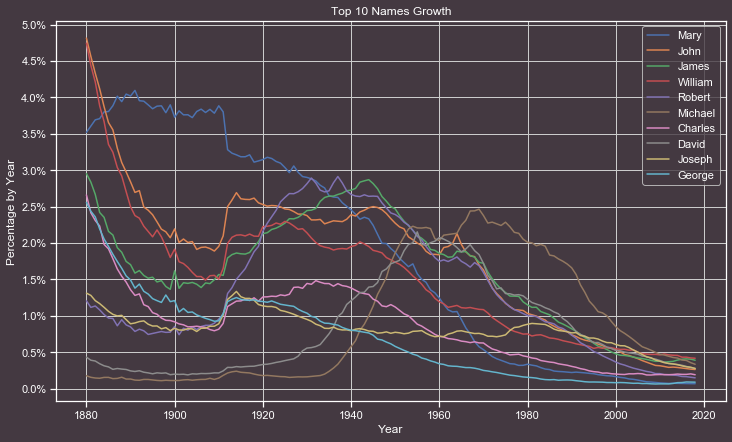

In [152]:
for name in transposed_df.columns.tolist():
    plt.plot(transposed_df.index, transposed_df[name], label=name)
    
yticks_labels = ["{}%".format(i) for i in np.arange(0, 5.5, 0.5)]
plt.yticks(np.arange(0, 5.5, 0.5), yticks_labels)

plt.legend()
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Percentage by Year")
plt.title("Top 10 Names Growth")
plt.show()

## Top 10 Trending Names

In [153]:
filtered_df = df[df["year"] >= 2008]

filtered_df

,year,name,gender,count
1588251,2008,Emma,F,18813
1588252,2008,Isabella,F,18616
1588253,2008,Emily,F,17434
1588254,2008,Olivia,F,17081
1588255,2008,Ava,F,17039
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [155]:
pivoted_df = filtered_df.pivot_table(index="name", columns="year", values="count", aggfunc=np.sum).fillna(0)

pivoted_df

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
name,,,,,,,,,,,
Aaban,0.0,6.0,9.0,11.0,11.0,14.0,16.0,15.0,9.0,11.0,7.0
Aabha,0.0,0.0,0.0,7.0,5.0,0.0,9.0,7.0,7.0,0.0,0.0
Aabid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0
Aabidah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
Aabir,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
Zyvion,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zyvon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
Zyyanna,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
percentage_df = pivoted_df / pivoted_df.sum() * 100

percentage_df

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
name,,,,,,,,,,,
Aaban,0.0,0.000157,0.000244,0.000301,0.000301,0.000385,0.000433,0.000406,0.000246,0.000309,0.000201
Aabha,0.0,0.000000,0.000000,0.000192,0.000137,0.000000,0.000243,0.000190,0.000191,0.000000,0.000000
Aabid,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000137,0.000000,0.000172
Aabidah,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000143
Aabir,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000137,0.000000,0.000143
...,...,...,...,...,...,...,...,...,...,...,...
Zyvion,0.0,0.000131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Zyvon,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000190,0.000000,0.000000,0.000000
Zyyanna,0.0,0.000000,0.000163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [159]:
percentage_df["total"] = percentage_df.sum(axis=1)

percentage_df

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,total
name,,,,,,,,,,,,
Aaban,0.0,0.000157,0.000244,0.000301,0.000301,0.000385,0.000433,0.000406,0.000246,0.000309,0.000201,0.005965
Aabha,0.0,0.000000,0.000000,0.000192,0.000137,0.000000,0.000243,0.000190,0.000191,0.000000,0.000000,0.001906
Aabid,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000137,0.000000,0.000172,0.000617
Aabidah,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000143,0.000287
Aabir,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000137,0.000000,0.000143,0.000560
...,...,...,...,...,...,...,...,...,...,...,...,...
Zyvion,0.0,0.000131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000262
Zyvon,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000190,0.000000,0.000000,0.000000,0.000379
Zyyanna,0.0,0.000000,0.000163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000325


In [161]:
sorted_df = percentage_df.sort_values("total", ascending=False).drop("total", axis=1)[0:10]

sorted_df

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
name,,,,,,,,,,,
Emma,0.479418,0.469404,0.470283,0.515608,0.574046,0.575930,0.566328,0.554308,0.533491,0.556264,0.536137
Olivia,0.435723,0.457299,0.461994,0.474629,0.474625,0.507017,0.536103,0.533588,0.529827,0.525411,0.514115
Sophia,0.409853,0.444198,0.559859,0.598522,0.611449,0.583871,0.503580,0.472130,0.441413,0.418363,0.399816
Noah,0.403411,0.453735,0.447774,0.463707,0.477281,0.503857,0.524803,0.535538,0.526300,0.521705,0.528825
Isabella,0.474707,0.585137,0.621455,0.545718,0.523446,0.485254,0.462568,0.423566,0.404806,0.426505,0.415186
Jacob,0.576050,0.555529,0.600137,0.558255,0.522980,0.499570,0.456783,0.432585,0.397124,0.370412,0.337763
William,0.469003,0.469875,0.462482,0.475505,0.462851,0.457639,0.455350,0.431312,0.431435,0.420694,0.416534
Ethan,0.515677,0.520654,0.488133,0.457302,0.484482,0.446731,0.425611,0.408858,0.378178,0.349469,0.340258
Ava,0.434272,0.416503,0.418493,0.424837,0.425859,0.419555,0.424746,0.444124,0.445979,0.448375,0.428204


In [162]:
transposed_df = sorted_df.transpose()

transposed_df

name,Emma,Olivia,Sophia,Noah,Isabella,Jacob,William,Ethan,Ava,Michael
year,,,,,,,,,,
2008,0.479418,0.435723,0.409853,0.403411,0.474707,0.576050,0.469003,0.515677,0.434272,0.526601
2009,0.469404,0.457299,0.444198,0.453735,0.585137,0.555529,0.469875,0.520654,0.416503,0.497440
2010,0.470283,0.461994,0.559859,0.447774,0.621455,0.600137,0.462482,0.488133,0.418493,0.470960
2011,0.515608,0.474629,0.598522,0.463707,0.545718,0.558255,0.475505,0.457302,0.424837,0.460724
2012,0.574046,0.474625,0.611449,0.477281,0.523446,0.522980,0.462851,0.484482,0.425859,0.443465
2013,0.575930,0.507017,0.583871,0.503857,0.485254,0.499570,0.457639,0.446731,0.419555,0.426892
2014,0.566328,0.536103,0.503580,0.524803,0.462568,0.456783,0.455350,0.425611,0.424746,0.418745
2015,0.554308,0.533588,0.472130,0.535538,0.423566,0.432585,0.431312,0.408858,0.444124,0.391848
2016,0.533491,0.529827,0.441413,0.526300,0.404806,0.397124,0.431435,0.378178,0.445979,0.386079


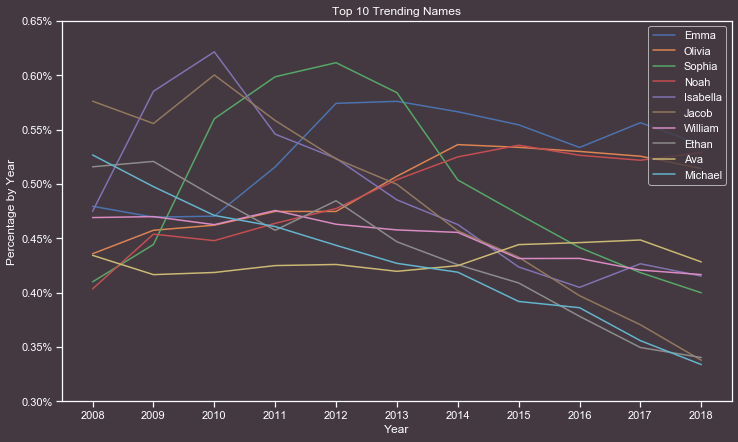

In [164]:
for name in transposed_df.columns.tolist():
    plt.plot(transposed_df.index, transposed_df[name], label=name)
    
yticks_labels = ["{:.2f}%".format(i) for i in np.arange(0.3, 0.7, 0.05)]
plt.yticks(np.arange(0.3, 0.7, 0.05), yticks_labels)

xticks_labels = ["{}".format(i) for i in range(2008, 2618+1, 1)]
plt.xticks(np.arange(2008, 2018+1, 1), xticks_labels)

plt.legend()
plt.grid(False)
plt.xlabel("Year")
plt.ylabel("Percentage by Year")
plt.title("Top 10 Trending Names")
plt.show()

# original project address:
https://github.com/PhantomInsights/baby-names-analysis